# PRAKTIKUM 3

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Contoh dataset (buat dummy data)
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100)

# Evaluasi
print("Prediksi:", model.predict(X_test))

c:\Users\khoir\anaconda3\envs\ml310\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.7955
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.7893
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.7830
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.7768
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.7706
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.7645
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.7583
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.7523
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.7462
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.7402
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.7342
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.7282
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.7223
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.7164
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.7105
Epoch 16/100
1/1 ━━━━

Tugas 4:
- Ubah learning rate.
- Bandingkan hasil loss.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Dataset dummy
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fungsi untuk membuat dan melatih model
def train_model(lr=0.01, epochs=100):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mse')
    
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0)
    loss = model.evaluate(X_test, y_test, verbose=0)
    return loss

# Bandingkan beberapa learning rate
learning_rates = [0.001, 0.01, 0.1]
for lr in learning_rates:
    loss = train_model(lr=lr)
    print(f"Learning rate: {lr}, Loss: {loss:.6f}")


c:\Users\khoir\anaconda3\envs\ml310\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Learning rate: 0.001, Loss: 0.168025
Learning rate: 0.01, Loss: 0.000003
Learning rate: 0.1, Loss: 0.001119


c:\Users\khoir\anaconda3\envs\ml310\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


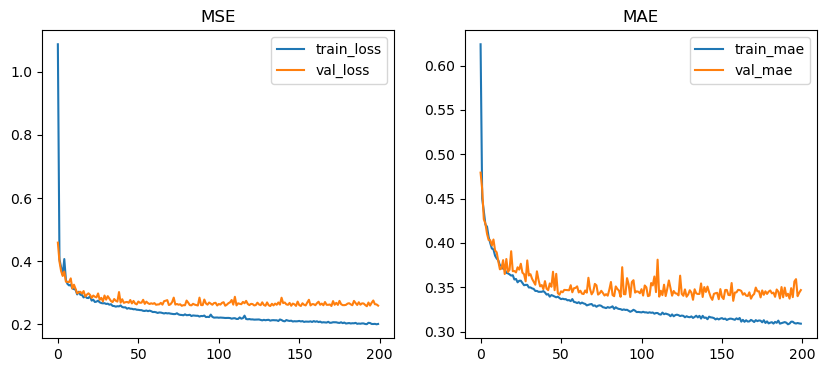

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
RMSE: 0.5088883516054787


In [4]:
# MLP regresi (Keras)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Load
data = fetch_california_housing()
X = data.data; y = data.target

# 2. Preprocess
scaler = StandardScaler(); Xs = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(Xs, y, test_size=0.2, random_state=42)

# 3. Build model
model = Sequential([
Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
Dense(32, activation='relu'),
Dense(1)
])
model.compile(optimizer=Adam(1e-3), loss='mse', metrics=['mae'])

# 4. Train
h = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32, verbose=0)

# 5. Plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(h.history['loss'], label='train_loss'); plt.plot(h.history['val_loss'], label='val_loss'); plt.legend(); plt.title('MSE')
plt.subplot(1,2,2); plt.plot(h.history['mae'], label='train_mae'); plt.plot(h.history['val_mae'], label='val_mae'); plt.legend(); plt.title('MAE')
plt.show()

from sklearn.metrics import mean_squared_error
pred = model.predict(X_val)
print('RMSE:', np.sqrt(mean_squared_error(y_val, pred)))